# 2019 Bay Wheels Ride Data Exploration and Visualization
<br>

## by Sourojyoti Paul

<br>

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

>In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019.The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import datetime as dt

%matplotlib inline

## Gathering and Assessing Data
Loading dataset and describing and assessing the same.

In [2]:
folder_name = '/content/drive/MyDrive/data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(2506983, 17)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
1746161,192,2019-06-10 08:29:50.2610,2019-06-10 08:33:03.0550,77.0,11th St at Natoma St,37.773507,-122.416040,77.0,11th St at Natoma St,37.773507,-122.416040,1103,Customer,NaN,NaN,No,NaN
565405,982,2019-04-12 18:46:44.8680,2019-04-12 19:03:06.9410,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,123.0,Folsom St at 19th St,37.760594,-122.414817,2807,Customer,1988.0,Male,No,NaN
2467768,274,2019-02-07 12:58:53.8340,2019-02-07 13:03:28.3880,61.0,Howard St at 8th St,37.776513,-122.411306,349.0,Howard St at Mary St,37.781010,-122.405666,3621,Subscriber,1999.0,Male,No,NaN
213925,882,2019-03-29 08:47:26.5250,2019-03-29 09:02:08.7110,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,87.0,Folsom St at 13th St,37.769757,-122.415674,2032,Subscriber,1974.0,Male,No,NaN
1250292,778,2019-08-16 16:26:04.7450,2019-08-16 16:39:02.9370,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,31.0,Raymond Kimbell Playground,37.783813,-122.434559,1244,Subscriber,NaN,NaN,No,NaN


In [3]:
df = result.copy()
df.shape

(2506983, 17)

In [4]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  rental_access_method     object 
dtypes: float64(7), int64(2), object(8)
memory usage: 325.2+ MB


#### Observation
>from the above we can see there are mismatch in datatype for various features
* start_time
* end_time
* start_station_id
* end_station_id
* bike_id
* user_type
* member_gender

In [5]:
#to check if there are any null values present in th dataset
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
member_birth_year          1676986
member_gender              1676983
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

#### Observation
> null values found in the below features
* start_station_id
* start_station_name
* end_station_id
* end_station_name
* member_birth_year
* member_gender
* bike_share_for_all_trip
* rental_access_method

In [6]:
#checking the presence of duplicated values in the dataset
df.duplicated().sum()

0

#### Observation
> none of the features are having duplicates

In [7]:
#this business has two user types 'Subscriber' & 'Customer'
#checking which user type is having more members
df.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

#### Observation
> subscriber user type is clearly having more members than customer user type

### Cleaning Data

In [8]:
#as part of best practices, it is always helpful to have the dataframe copied
df_copy = df.copy()

*let us now begin by fixing the issues*

#### Issue #1
*multiple fields that are not in the correct dtype*

In [9]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2506983 non-null  object        
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2506983 non-null  object        
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  object        
 12  

In [10]:
df_backup = df.copy()
df_backup.shape

(2506983, 17)

#### Issue #2
add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

In [11]:
#df['duration_minute'] = df['duration_sec']/60

df['start_date'] = df['start_time'].dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df['start_time'].dt.strftime('%H')
df['start_dayofweek'] = df['start_time'].dt.strftime('%A')
df['start_month'] = df['start_time'].dt.strftime('%B')

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method,start_date,start_hourofday,start_dayofweek,start_month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No,NaN,2019-01-31,17,Thursday,January
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No,NaN,2019-01-31,20,Thursday,January
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No,NaN,2019-01-31,18,Thursday,January
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No,NaN,2019-01-31,19,Thursday,January
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No,NaN,2019-01-31,14,Thursday,January


In [12]:
df.shape

(2506983, 21)

In [13]:
df_backup2 = df.copy()

In [14]:
df = df_backup2.copy()

In [15]:
df['duration_minute'] = (df['duration_sec']/60)

In [16]:
df.shape

(2506983, 22)

In [17]:
df_backup['start_month'] = df_backup['start_time'].dt.strftime('%B')

In [18]:
df.start_month.unique()

array(['January', 'March', 'April', 'September', 'October', 'August',
       'July', 'June', 'May', 'November', 'December', 'February'],
      dtype=object)

#### Issue #3
add a new column calculating riders' age from 'member_birth_year'

In [19]:
df['member_age'] = 2019 - df['member_birth_year']
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,829997.000000,2.506983e+06,829997.000000
mean,8.076483e+02,3.776506e+01,-1.223499e+02,3.776422e+01,-1.223459e+02,1984.731395,1.346081e+01,34.268605
std,1.974714e+03,1.363698e-01,3.089648e-01,2.392885e-01,7.080417e-01,10.060782,3.291190e+01,10.060782
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225143e+02,1878.000000,1.000000e+00,18.000000
25%,3.590000e+02,3.776931e+01,-1.224130e+02,3.777003e+01,-1.224117e+02,1980.000000,5.983333e+00,27.000000
50%,5.710000e+02,3.778053e+01,-1.223983e+02,3.778076e+01,-1.223981e+02,1987.000000,9.516667e+00,32.000000
75%,8.870000e+02,3.779539e+01,-1.222914e+02,3.779587e+01,-1.222934e+02,1992.000000,1.478333e+01,39.000000
max,9.121100e+05,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00,2001.000000,1.520183e+04,141.000000


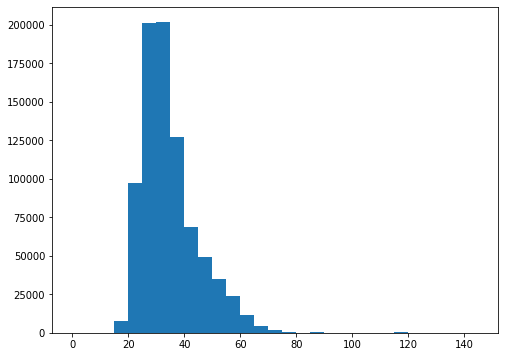

In [20]:
# plotting the distribution of member's age, visually examine for some outliers over 100 yrs old

plt.figure(figsize=[8, 6])
bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(df['member_age'].dropna(), bins=bins);

#### Issue #4 & #5
* filtering out outlier ages from visually examination of the distribution above
* casting 'member_birth_year' and 'member_age' to integer instead of float type

In [21]:
#df['member_birth_year'] = df['member_birth_year'].astype('int')
#df['member_age'] = df['member_age'].astype('int')
df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].mean())
df['member_age'] = df['member_age'].fillna(df['member_age'].mean())
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['member_age'] = df['member_age'].astype('int')
#slicing dataset to get members whose age is less than or equal to 70
df = df.query('member_age <= 70')
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504488 entries, 0 to 2506982
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2504488 non-null  int64         
 1   start_time               2504488 non-null  datetime64[ns]
 2   end_time                 2504488 non-null  datetime64[ns]
 3   start_station_id         2504488 non-null  object        
 4   start_station_name       2424355 non-null  object        
 5   start_station_latitude   2504488 non-null  float64       
 6   start_station_longitude  2504488 non-null  float64       
 7   end_station_id           2504488 non-null  object        
 8   end_station_name         2422138 non-null  object        
 9   end_station_latitude     2504488 non-null  float64       
 10  end_station_longitude    2504488 non-null  float64       
 11  bike_id                  2504488 non-null  object        
 12  

### What is the structure of your dataset?

> The original combined data contains approximately 1,860,000 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:
> * trip duration: duration_sec, start_time, end_time
> * station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude
> * member info (anonymized): bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

Derived features/variables to assist exploration and analysis:

> * trip info: duration_minute, start_date, start_hourofday, start_dayofweek, start_month
> * member: member_age

### What is/are the main feature(s) of interest in your dataset?

> We are most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' characteristics, i.e. their user type, gender, age, etc, to get a sense of how and what people are using the bike sharing service for. Sample questions to answer: When are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The member information like user type, gender and age will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

*A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.*

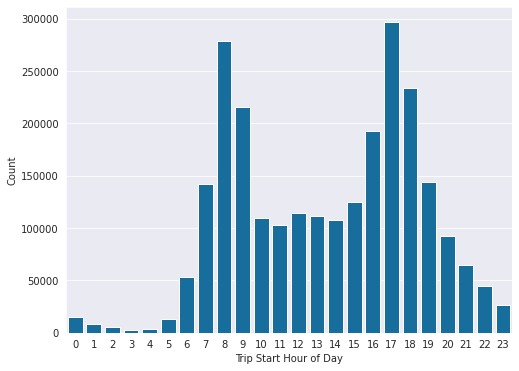

In [22]:
#need to convert 'start_hourofday' field from string to object
#for visualization purposes
df['start_hourofday'] = df['start_hourofday'].astype('int')

# trip distribution over day hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

#### Issue #6
cast 'start_dayofweek' to category dtype

In [23]:
df.shape

(2504488, 23)

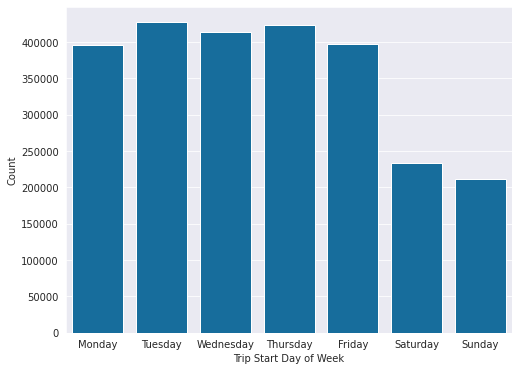

In [24]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=df, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

#### Issue #7
cast 'start_month' to category dtype for easy plotting

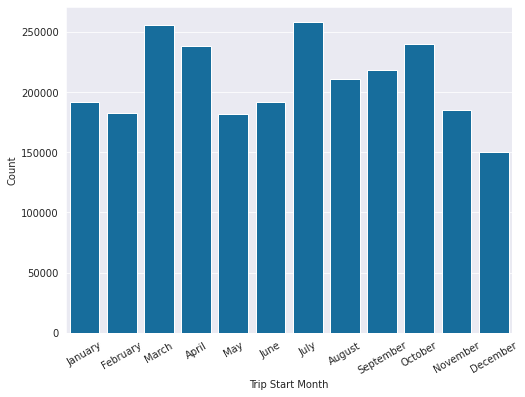

In [25]:
## trip distribution over months
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(monthcat)

sb.countplot(data=df, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

In [26]:
df.shape

(2504488, 23)

*The trip distribution over day hours peaks around two timeframes, 8am-9am and 17pm-18pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. In the 12 months in 2019, March & July had the most ride trips compared to the others, but overall it was the most popular during Summar, (March-April), probably due to the weather in the area.*

<br>
The next several plots are around members/users to see what makes up of the riders.

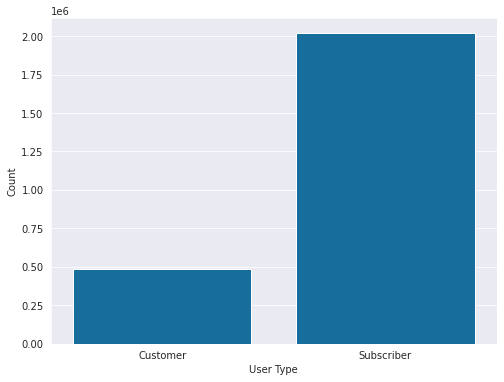

In [27]:
sb.countplot(data=df, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

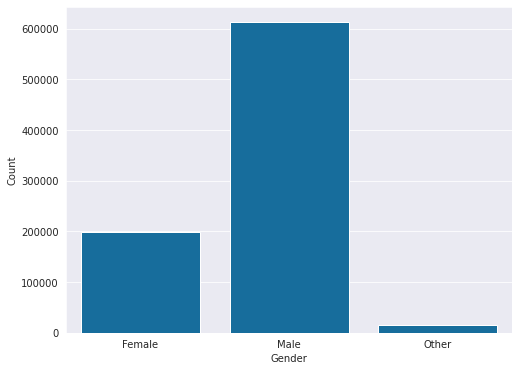

In [28]:
sb.countplot(data=df, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');

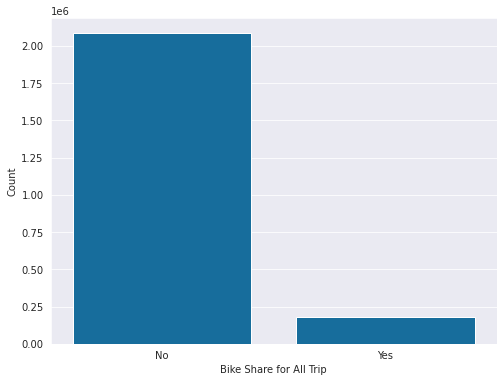

In [29]:
sb.countplot(data=df, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

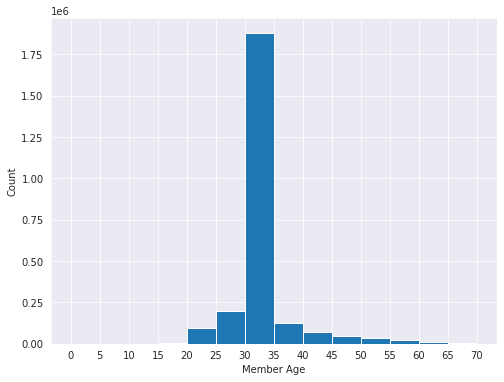

In [30]:
bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

*Most riders were male subscribers who did not use bike share for all trips. Most members were around 25 to 40 years old, corresponding to the trip distribution plots that most trips were on Mon-Fri and maxed during rush hours of a day. As the age gets older, bike usage dropped significantly.*

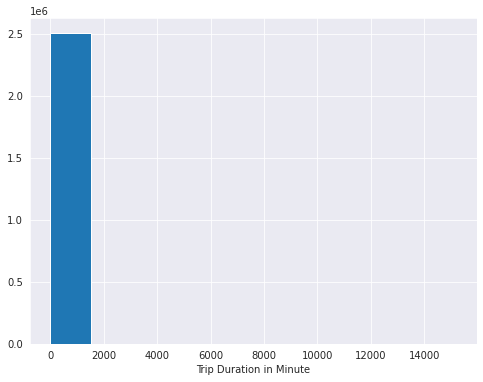

In [31]:
plt.hist(data=df, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

*It was a little surprising to see the duration distribution spans pretty far to the right (indicates a long time rental, almost 24 hrs) while the majority of the rides were quite short (within 200 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like.*

In [32]:
df['duration_minute'].describe(percentiles=[.99])

count    2.504488e+06
mean     1.346298e+01
std      3.291528e+01
min      1.000000e+00
50%      9.516667e+00
99%      6.876667e+01
max      1.520183e+04
Name: duration_minute, dtype: float64

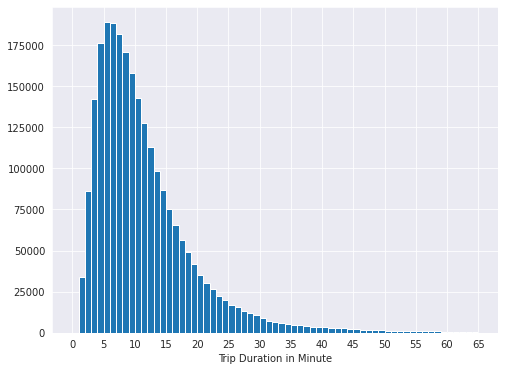

In [33]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

*It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.*

In [34]:
df_backup3 = df.copy()
# issue 8: filter out outlier trip records where the duration was very long

df = df.query('duration_minute <= 66')
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477927 entries, 6 to 2506982
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2477927 non-null  int64         
 1   start_time               2477927 non-null  datetime64[ns]
 2   end_time                 2477927 non-null  datetime64[ns]
 3   start_station_id         2477927 non-null  object        
 4   start_station_name       2398966 non-null  object        
 5   start_station_latitude   2477927 non-null  float64       
 6   start_station_longitude  2477927 non-null  float64       
 7   end_station_id           2477927 non-null  object        
 8   end_station_name         2396910 non-null  object        
 9   end_station_latitude     2477927 non-null  float64       
 10  end_station_longitude    2477927 non-null  float64       
 11  bike_id                  2477927 non-null  object        
 12  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>*The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri) compared to weekends. Summar time was the most popular season of a year, likely due to the weather.*
<br>
<br>
*User-wise, there were more male riders than female, and most members were subscribers compared to casual riders. The majority of the members did not use bike share for all of their trips, and most were around 25 to 40 years old.*
<br>
<br>
*Most rides were quick and short, lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.*
<br>
<br>
No transformation was needed luckily due to the straightforwardness of the data.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>*The distribution of the trip duration was a little surprising at first plotting out the original data. Used .describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study with .query().*

In [35]:
# save the clean data to a .csv file

df.to_csv('fordgobike_trips_2019_clean.csv', index=False)

## Bivariate Exploration


*How does the trip duration distribution vary between customers and subscribers?*

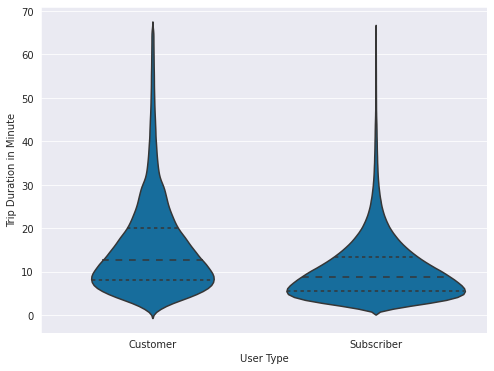

In [36]:
sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

*The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.*
<br>
<br>

How does the trip duration distribution vary by gender?

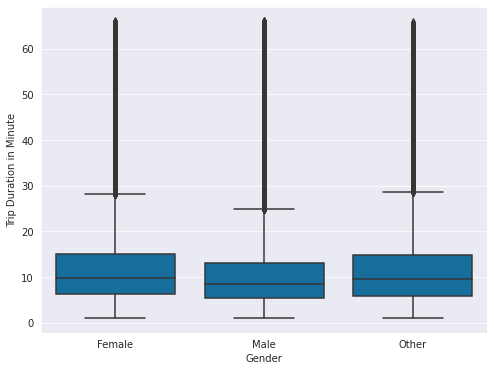

In [37]:
sb.boxplot(data=df, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

*Though not a huge difference, male riders tend to have shorter trips compared to female users, indicated by both a smaller median and shorter IQR.*
<br>
<br>
Average Trip Duration on Weekdays

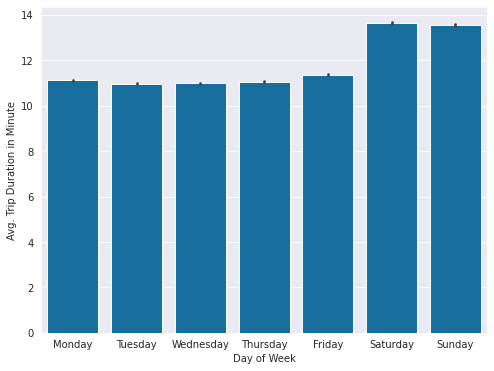

In [38]:
sb.barplot(data=df, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

*The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.*
<br>
<br>
Average trip duration by month

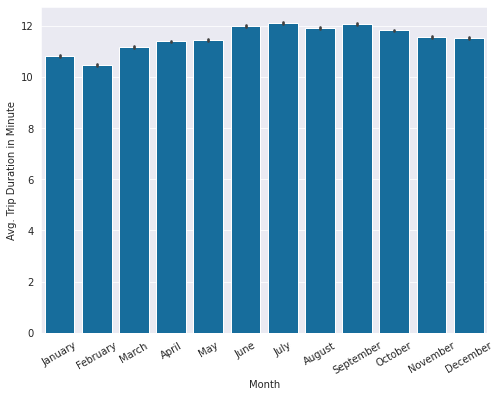

In [39]:
sb.barplot(data=df, x='start_month', y='duration_minute', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

*Starting from March, the average usage time shown an increasing trend almost all the way til October before it down turned. The average longest trips happened during the summer months, around June, July and September, which probably has a lot to do with the weather in the area.*
<br>
<br>
Member age by weekdays

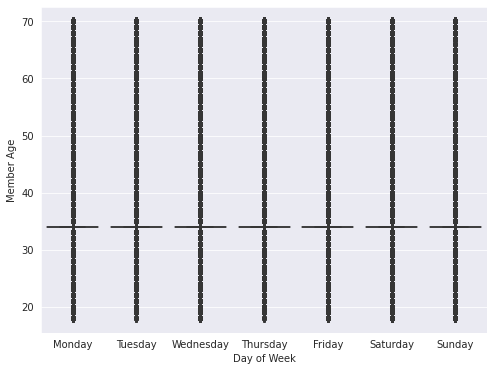

In [40]:
sb.boxplot(data=df, x='start_dayofweek', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

Weekly usage between customers and subscribers

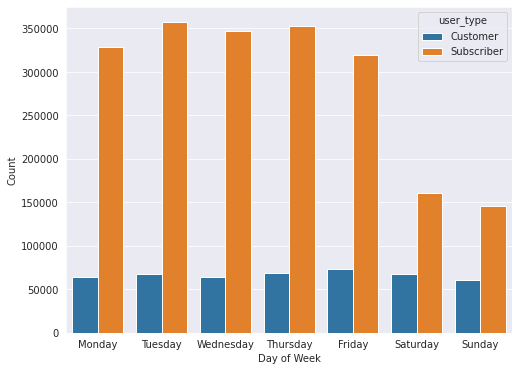

In [41]:
sb.countplot(data=df, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

*There was much more subscriber usage than casual customers overall. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost the opposite pattern of a slight increase of use for customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.*

Daily usage between customers and subscribers

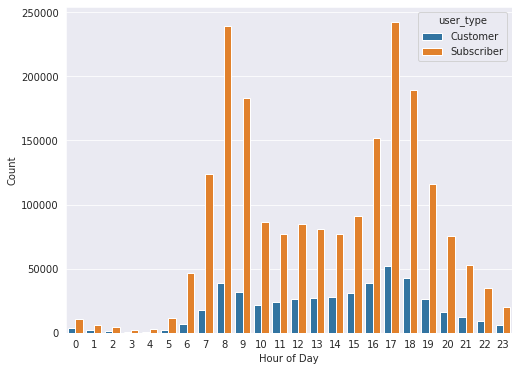

In [42]:
sb.countplot(data=df, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

*Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.*
<br>
<br>
Yearly usage between customers and subscribers

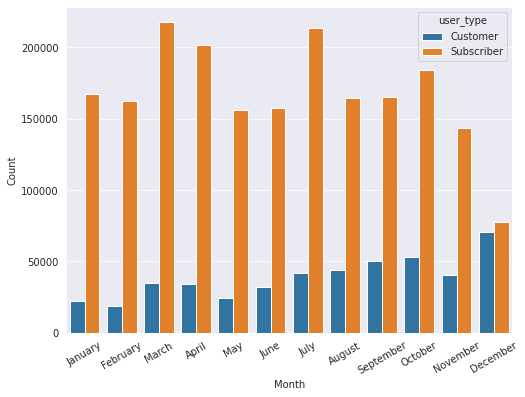

In [43]:
sb.countplot(data=df, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

*Both subscribers and customers ride the most during the summer months with subscribers maxed out in March and customers peaked in March. The usage was clearly not popular during winter season like November, December and January likely due to the weather.*

Member age between customers and subscribers

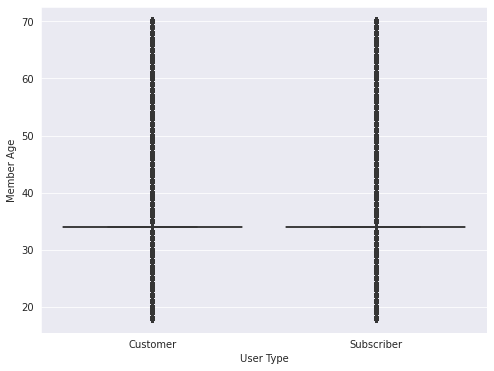

In [44]:
sb.boxplot(data=df, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>*There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. Subscriber users are slightly older than customer users who tend to take longer rides overall especially during the summer*


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>*It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides. And October had the most bike riding usage for subscribers throughout the year.*

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

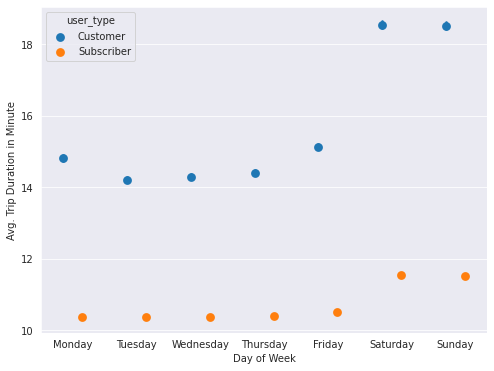

In [45]:
sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

*It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.*
<br>
<br>
How does the hourly usage vary during weekdays for customers and subscribers?

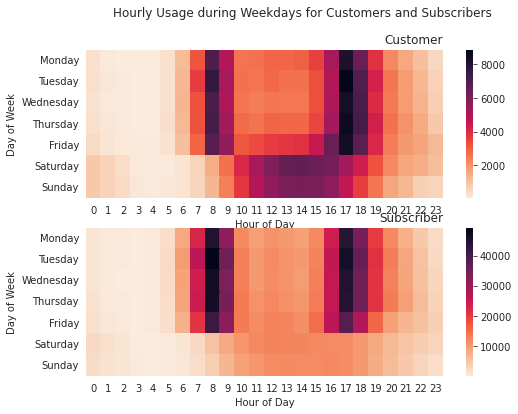

In [46]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

>*The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.*

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>*The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.*

### Were there any interesting or surprising interactions between features?

>*The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. The usage habit difference between male and female is not that much or obvious throughout the exploration, which could be related to the imbalanced number of female riders/records compared to male ones. It'd be interesting to see how male and female use the system differently if there were more female data.*

In [1]:
jupyter nbconvert --to html fordgo_bike_exploration.ipynb

SyntaxError: invalid syntax (Temp/ipykernel_10568/909845365.py, line 1)